## This script reads CESM2 Soil Moisture data downloaded from Casper in NCAR (Fig 13)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 
import matplotlib as mpl
import shapefile as shp
import cartopy.io.shapereader as shpreader
from numpy import linspace
from numpy import meshgrid
import matplotlib.colors as colors
from numpy import array, ma
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.feature as cfeature

from netCDF4 import Dataset 


## Basin shape files

In [2]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'

In [3]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)


In [4]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#

In [5]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

## Lat

In [6]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

y_US = latUs_cesm2.shape[0]
print(y_US)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]
32


In [7]:
lats_Us = latUs_cesm2

## Lon

In [8]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

x_US = lonUs_cesm2.shape[0]
print(x_US)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
56


In [9]:
lons_Us = lonUs_cesm2

### Historical (1930-2014): 1020 months

In [10]:
file_histSel_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/monSoilMoistUsHistSelEnsMean.npy'
file_histSel_ensMean_loaded = np.load(file_histSel_ensMean)
print(file_histSel_ensMean_loaded.shape)

(1020, 32, 56)


### Scenario (2105-2100): 1032 months

In [11]:
file_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/monSoilMoistUsScenEnsMean.npy'
file_scen_ensMean_loaded = np.load(file_scen_ensMean)
print(file_scen_ensMean_loaded.shape)

(1032, 32, 56)


## Concatenate two data arrays

In [12]:
param_histSel_scen_ensMean_Us = np.concatenate((file_histSel_ensMean_loaded, file_scen_ensMean_loaded), axis=0)
print(param_histSel_scen_ensMean_Us.shape)

(2052, 32, 56)


## The two files (Hist selected and Scen)

In [13]:
print(file_histSel_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1020, 32, 56)
(1032, 32, 56)


## The four time slots

In [14]:

#histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [15]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [16]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

492 854
362


## Era 1

In [17]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr + 2  # To include Jan and Feb of the following year in 2045
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 362
362


## Era 2

In [18]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2075
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 722
362


## Era 3

In [19]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr   # Data ends at Dec, 2100
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [20]:
print(file_histSel_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1020, 32, 56)
(1032, 32, 56)


In [21]:
param_refPeriod_Us_ensmean = file_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(362, 32, 56)


In [22]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(362, 32, 56)


In [23]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(362, 32, 56)


In [24]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Seasons start here

In [25]:
print(nMonsPerYr)

12


In [26]:
param_refPeriod_Us_ensmean = file_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(362, 32, 56)
(362, 32, 56)
(362, 32, 56)
(312, 32, 56)


## MAM

## ref Period

In [27]:
mamMonSt = 3
mamMonMid = 4
mamMonEnd = 5

In [28]:

param_mamSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_refPeriod_Us_ensmean.shape)

param_mamMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_refPeriod_Us_ensmean.shape)

param_mamEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [29]:
param_mamSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamSt_refPeriod_Us_ensmean, axis = 0)
print(param_mamSt_refPeriod_Us_ensmean_timeAvg.shape)

param_mamMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamMid_refPeriod_Us_ensmean, axis = 0)
print(param_mamMid_refPeriod_Us_ensmean_timeAvg.shape)

param_mamEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_refPeriod_Us_ensmean, axis = 0)
print(param_mamEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [30]:
param_mamTot_refPeriod_Us_ensmean_timeAvg = (param_mamSt_refPeriod_Us_ensmean_timeAvg+param_mamMid_refPeriod_Us_ensmean_timeAvg+param_mamEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_mamTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [31]:

param_mamSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraOne_Us_ensmean.shape)

param_mamMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraOne_Us_ensmean.shape)

param_mamEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [32]:
param_mamSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraOne_Us_ensmean, axis = 0)
print(param_mamSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraOne_Us_ensmean, axis = 0)
print(param_mamMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [33]:
param_mamTot_scenEraOne_Us_ensmean_timeAvg = (param_mamSt_scenEraOne_Us_ensmean_timeAvg+param_mamMid_scenEraOne_Us_ensmean_timeAvg+param_mamEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [34]:

param_mamSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraTwo_Us_ensmean.shape)

param_mamMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraTwo_Us_ensmean.shape)

param_mamEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [35]:
param_mamSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [36]:
param_mamTot_scenEraTwo_Us_ensmean_timeAvg = (param_mamSt_scenEraTwo_Us_ensmean_timeAvg+param_mamMid_scenEraTwo_Us_ensmean_timeAvg+param_mamEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [37]:

param_mamSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraThree_Us_ensmean.shape)

param_mamMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraThree_Us_ensmean.shape)

param_mamEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [38]:
param_mamSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraThree_Us_ensmean, axis = 0)
print(param_mamSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraThree_Us_ensmean, axis = 0)
print(param_mamMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [39]:
param_mamTot_scenEraThree_Us_ensmean_timeAvg = (param_mamSt_scenEraThree_Us_ensmean_timeAvg+param_mamMid_scenEraThree_Us_ensmean_timeAvg+param_mamEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [40]:
param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraOne_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [41]:
param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraTwo_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [42]:
param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraThree_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (MAM)

## Writing in an Xarray Data array

In [43]:
y_Us, x_Us = param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape             
print(y_Us)
print(x_Us)

32
56


In [44]:
param_mamTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_mamTot_scenEraOne_diff_Us_xarray.shape)
print(param_mamTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.33985914,  -1.3249967 , ..., -11.06618384,
          0.72055314,   0.90807738],
       [ -0.5337951 ,  -2.0921782 ,   0.20838199, ...,  -0.85976755,
         -5.77312217, -17.04309113],
       [ -2.44089019,  -0.50492387,   0.03182978, ...,  -0.24918127,
         -0.03643447, -18.55722683]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [45]:
param_mamTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraTwo_diff_Us_xarray.shape)
print(param_mamTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.42436702,  -3.13526745, ..., -16.52582647,
          1.07722079,   1.32548938],
       [ -0.69325883,  -4.11019921,  -0.52032009, ..., -17.42381192,
        -19.5393456 , -17.39345068],
       [ -4.8112809 ,  -1.5080886 ,  -0.59716711, ..., -13.68092932,
        -13.45780233, -17.93155546]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [46]:
param_mamTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraThree_diff_Us_xarray.shape)
print(param_mamTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -5.00483514e-01, -4.63602579e+00, ...,
        -1.71715819e+01,  3.09456152e-01,  7.59001561e-03],
       [-8.33901760e-01, -5.54275951e+00, -1.94180742e+00, ...,
        -1.85253167e+01, -1.95908969e+01, -1.80417482e+01],
       [-6.50983283e+00, -3.19649645e+00, -1.55963679e+00, ...,
        -1.65064958e+01, -1.67639845e+01, -1.76954032e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [47]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [48]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [49]:
param_mamTot_scenEraOne_diff_masked_Missi = param_mamTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraOne_diff_masked_Missi.shape)
print(param_mamTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [50]:
param_mamTot_scenEraTwo_diff_masked_Missi = param_mamTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraTwo_diff_masked_Missi.shape)
print(param_mamTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [51]:
param_mamTot_scenEraThree_diff_masked_Missi = param_mamTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraThree_diff_masked_Missi.shape)
print(param_mamTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [52]:
maxVal_mamTot_diff_masked_scenEraOne = np.nanmax(param_mamTot_scenEraOne_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraOne)
minVal_mamTot_diff_masked_scenEraOne = np.nanmin(param_mamTot_scenEraOne_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraOne)

0.11850772009957211
-2.972882065243194


In [53]:
maxVal_mamTot_diff_masked_scenEraTwo = np.nanmax(param_mamTot_scenEraTwo_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraTwo)
minVal_mamTot_diff_masked_scenEraTwo = np.nanmin(param_mamTot_scenEraTwo_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraTwo)

0.842953804439972
-4.4464207683139385


In [54]:
maxVal_mamTot_diff_masked_scenEraThree = np.nanmax(param_mamTot_scenEraThree_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraThree)
minVal_mamTot_diff_masked_scenEraThree = np.nanmin(param_mamTot_scenEraThree_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraThree)

1.5788177896157407
-5.33788058463529


## Plotting

In [55]:

latUsMin = lats_Us.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_Us.max()
print(latUsMax)

lonUsMin = lons_Us.min()
print(lonUsMin)

lonUsMax = lons_Us.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [56]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [57]:
x_Us = linspace(lonUsMin, lonUsMax, x_Us)
y_Us = linspace(latUsMin, latUsMax, y_Us)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [58]:
vmin_mamTot_scenEraOne = np.floor(minVal_mamTot_diff_masked_scenEraOne)
vmax_mamTot_scenEraOne = np.ceil(maxVal_mamTot_diff_masked_scenEraOne)
print(vmin_mamTot_scenEraOne)
print(vmax_mamTot_scenEraOne)

-3.0
1.0


In [59]:
vmin_mamTot_scenEraTwo = np.floor(minVal_mamTot_diff_masked_scenEraTwo)
vmax_mamTot_scenEraTwo = np.ceil(maxVal_mamTot_diff_masked_scenEraTwo)
print(vmin_mamTot_scenEraTwo)
print(vmax_mamTot_scenEraTwo)

-5.0
1.0


In [60]:
vmin_mamTot_scenEraThree = np.floor(minVal_mamTot_diff_masked_scenEraThree)
vmax_mamTot_scenEraThree = np.ceil(maxVal_mamTot_diff_masked_scenEraThree)
print(vmin_mamTot_scenEraThree)
print(vmax_mamTot_scenEraThree)

-6.0
2.0


In [61]:
nDiv_mamTot_scenEraOne = int(vmax_mamTot_scenEraOne - vmin_mamTot_scenEraOne + 1)
print(nDiv_mamTot_scenEraOne)

5


In [62]:
nDiv_mamTot_scenEraTwo = int(vmax_mamTot_scenEraTwo - vmin_mamTot_scenEraTwo + 1)
print(nDiv_mamTot_scenEraTwo)

7


In [63]:

nDiv_mamTot_scenEraThree = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_mamTot_scenEraThree)


9


## JJA

## ref Period

In [64]:
jjaMonSt = 6
jjaMonMid = 7
jjaMonEnd = 8

In [65]:

param_jjaSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_refPeriod_Us_ensmean.shape)

param_jjaMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_refPeriod_Us_ensmean.shape)

param_jjaEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [66]:
param_jjaSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_refPeriod_Us_ensmean, axis = 0)
print(param_jjaSt_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_refPeriod_Us_ensmean, axis = 0)
print(param_jjaMid_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_refPeriod_Us_ensmean, axis = 0)
print(param_jjaEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [67]:
param_jjaTot_refPeriod_Us_ensmean_timeAvg = (param_jjaSt_refPeriod_Us_ensmean_timeAvg+param_jjaMid_refPeriod_Us_ensmean_timeAvg+param_jjaEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_jjaTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [68]:

param_jjaSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraOne_Us_ensmean.shape)

param_jjaMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraOne_Us_ensmean.shape)

param_jjaEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [69]:
param_jjaSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [70]:
param_jjaTot_scenEraOne_Us_ensmean_timeAvg = (param_jjaSt_scenEraOne_Us_ensmean_timeAvg+param_jjaMid_scenEraOne_Us_ensmean_timeAvg+param_jjaEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2


In [71]:

param_jjaSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraTwo_Us_ensmean.shape)

param_jjaMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraTwo_Us_ensmean.shape)

param_jjaEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [72]:
param_jjaSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [73]:
param_jjaTot_scenEraTwo_Us_ensmean_timeAvg = (param_jjaSt_scenEraTwo_Us_ensmean_timeAvg+param_jjaMid_scenEraTwo_Us_ensmean_timeAvg+param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [74]:

param_jjaSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraThree_Us_ensmean.shape)

param_jjaMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraThree_Us_ensmean.shape)

param_jjaEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [75]:
param_jjaSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [76]:
param_jjaTot_scenEraThree_Us_ensmean_timeAvg = (param_jjaSt_scenEraThree_Us_ensmean_timeAvg+param_jjaMid_scenEraThree_Us_ensmean_timeAvg+param_jjaEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [77]:
param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraOne_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [78]:
param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraTwo_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [79]:
param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraThree_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)


(32, 56)


## Basin Mask (JJA)

## Writing in an Xarray Data array

In [80]:
param_jjaTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
                                                      
print(param_jjaTot_scenEraOne_diff_Us_xarray.shape)
print(param_jjaTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.29282127,  -2.4863116 , ..., -18.53993443,
         -4.83487791,  -7.8564566 ],
       [ -0.14963412,  -1.12779729,  -3.08521513, ...,  -5.91523382,
        -11.02637085, -20.29465289],
       [ -0.65587513,  -1.56850888,  -1.28522087, ...,  -1.20006137,
         -4.08043496, -18.84051853]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [81]:
param_jjaTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
                                                      
print(param_jjaTot_scenEraTwo_diff_Us_xarray.shape)
print(param_jjaTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.54379415,  -4.17840976, ..., -28.73557213,
         -7.38110946, -11.95565577],
       [ -0.38249476,  -2.06412675,  -5.60219758, ..., -28.02896785,
        -26.75290006, -23.62424114],
       [ -1.36542169,  -2.93148679,  -2.41296812, ..., -15.28410236,
        -22.98490572, -23.32525802]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [82]:
param_jjaTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
                                                      
print(param_jjaTot_scenEraThree_diff_Us_xarray.shape)
print(param_jjaTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.75239444,  -5.13067568, ..., -32.78595743,
         -9.82086377, -15.74820564],
       [ -0.56491141,  -2.7430128 ,  -7.25342582, ..., -36.13450364,
        -30.52340075, -26.70972238],
       [ -1.91293449,  -3.87040306,  -3.28412386, ..., -22.56779417,
        -34.87360068, -28.28333672]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [83]:
param_jjaTot_scenEraOne_diff_masked_Missi = param_jjaTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraOne_diff_masked_Missi.shape)
print(param_jjaTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [84]:
param_jjaTot_scenEraTwo_diff_masked_Missi = param_jjaTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraTwo_diff_masked_Missi.shape)
print(param_jjaTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [85]:
param_jjaTot_scenEraThree_diff_masked_Missi = param_jjaTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraThree_diff_masked_Missi.shape)
print(param_jjaTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [86]:
maxVal_jjaTot_diff_masked_scenEraOne = np.nanmax(param_jjaTot_scenEraOne_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraOne)
minVal_jjaTot_diff_masked_scenEraOne = np.nanmin(param_jjaTot_scenEraOne_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraOne)

1.3081532351175866
-3.451391632503938


In [87]:
maxVal_jjaTot_diff_masked_scenEraTwo = np.nanmax(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraTwo)
minVal_jjaTot_diff_masked_scenEraTwo = np.nanmin(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraTwo)

1.867835587395561
-5.41612370618185


In [88]:
maxVal_jjaTot_diff_masked_scenEraThree = np.nanmax(param_jjaTot_scenEraThree_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraThree)
minVal_jjaTot_diff_masked_scenEraThree = np.nanmin(param_jjaTot_scenEraThree_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraThree)

2.034810592455738
-7.878598794708907


In [89]:
vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_diff_masked_scenEraThree)
vmax_jjaTot_scenEraThree = np.ceil(maxVal_jjaTot_diff_masked_scenEraThree)
print(vmin_jjaTot_scenEraThree)
print(vmax_jjaTot_scenEraThree)

-8.0
3.0


In [90]:
nDiv_jjaTot_scenEraThree = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_jjaTot_scenEraThree)

12


## SON

## ref Period


In [91]:
sonMonSt = 9
sonMonMid = 10
sonMonEnd = 11

In [92]:

param_sonSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_refPeriod_Us_ensmean.shape)

param_sonMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_refPeriod_Us_ensmean.shape)

param_sonEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [93]:
param_sonSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonSt_refPeriod_Us_ensmean, axis = 0)
print(param_sonSt_refPeriod_Us_ensmean_timeAvg.shape)

param_sonMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonMid_refPeriod_Us_ensmean, axis = 0)
print(param_sonMid_refPeriod_Us_ensmean_timeAvg.shape)

param_sonEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_refPeriod_Us_ensmean, axis = 0)
print(param_sonEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [94]:
param_sonTot_refPeriod_Us_ensmean_timeAvg = (param_sonSt_refPeriod_Us_ensmean_timeAvg+param_sonMid_refPeriod_Us_ensmean_timeAvg+param_sonEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_sonTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [95]:

param_sonSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraOne_Us_ensmean.shape)

param_sonMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraOne_Us_ensmean.shape)

param_sonEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [96]:
param_sonSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraOne_Us_ensmean, axis = 0)
print(param_sonSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraOne_Us_ensmean, axis = 0)
print(param_sonMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [97]:
param_sonTot_scenEraOne_Us_ensmean_timeAvg = (param_sonSt_scenEraOne_Us_ensmean_timeAvg+param_sonMid_scenEraOne_Us_ensmean_timeAvg+param_sonEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [98]:

param_sonSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraTwo_Us_ensmean.shape)

param_sonMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraTwo_Us_ensmean.shape)

param_sonEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [99]:
param_sonSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [100]:
param_sonTot_scenEraTwo_Us_ensmean_timeAvg = (param_sonSt_scenEraTwo_Us_ensmean_timeAvg+param_sonMid_scenEraTwo_Us_ensmean_timeAvg+param_sonEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [101]:

param_sonSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraThree_Us_ensmean.shape)

param_sonMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraThree_Us_ensmean.shape)

param_sonEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [102]:
param_sonSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraThree_Us_ensmean, axis = 0)
print(param_sonSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraThree_Us_ensmean, axis = 0)
print(param_sonMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [103]:
param_sonTot_scenEraThree_Us_ensmean_timeAvg = (param_sonSt_scenEraThree_Us_ensmean_timeAvg+param_sonMid_scenEraThree_Us_ensmean_timeAvg+param_sonEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [104]:
param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraOne_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [105]:
param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraTwo_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [106]:
param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraThree_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (SON)


## Writing in an Xarray Data array

In [107]:
param_sonTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraOne_diff_Us_xarray.shape)
print(param_sonTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  6.45780067e-02, -4.10567446e-01, ...,
        -1.87660418e+01, -2.64003571e+00, -2.93578422e+00],
       [ 7.50171318e-02, -2.08033583e-01, -4.98886567e-01, ...,
        -5.89809839e+00, -1.14892401e+01, -2.42293644e+01],
       [-4.00738195e-02,  5.42038049e-03, -5.19886082e-01, ...,
        -1.67727379e+00, -4.56363402e+00, -2.58248613e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [108]:
param_sonTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraTwo_diff_Us_xarray.shape)
print(param_sonTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  5.46738535e-01, -5.62942580e-01, ...,
        -2.77124463e+01, -4.17519870e+00, -4.54133030e+00],
       [ 4.81194438e-01, -2.15162776e-01, -8.67739759e-01, ...,
        -2.80073811e+01, -2.87397100e+01, -2.71476017e+01],
       [ 7.71069556e-02, -5.61101956e-03, -8.12772719e-01, ...,
        -1.80416388e+01, -2.45312486e+01, -2.83537498e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [109]:
param_sonTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraThree_diff_Us_xarray.shape)
print(param_sonTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   1.02422925,  -0.64343748, ..., -29.54484362,
         -6.03781285,  -6.31875485],
       [  0.96196196,  -0.12274373,  -1.15393835, ..., -31.95548859,
        -30.80066934, -29.08345872],
       [  0.29417563,  -0.06637319,  -1.02232339, ..., -22.24446359,
        -31.22966616, -30.30666248]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [110]:
param_sonTot_scenEraOne_diff_masked_Missi = param_sonTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraOne_diff_masked_Missi.shape)
print(param_sonTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [111]:
param_sonTot_scenEraTwo_diff_masked_Missi = param_sonTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraTwo_diff_masked_Missi.shape)
print(param_sonTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [112]:
param_sonTot_scenEraThree_diff_masked_Missi = param_sonTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraThree_diff_masked_Missi.shape)
print(param_sonTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [113]:
maxVal_sonTot_diff_masked_scenEraOne = np.nanmax(param_sonTot_scenEraOne_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraOne)
minVal_sonTot_diff_masked_scenEraOne = np.nanmin(param_sonTot_scenEraOne_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraOne)

0.5683209016587973
-5.082031433105467


In [114]:
maxVal_sonTot_diff_masked_scenEraTwo = np.nanmax(param_sonTot_scenEraTwo_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraTwo)
minVal_sonTot_diff_masked_scenEraTwo = np.nanmin(param_sonTot_scenEraTwo_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraTwo)

0.6325506223042794
-6.576573347303604


In [115]:
maxVal_sonTot_diff_masked_scenEraThree = np.nanmax(param_sonTot_scenEraThree_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraThree)
minVal_sonTot_diff_masked_scenEraThree = np.nanmin(param_sonTot_scenEraThree_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraThree)

1.717475512822471
-7.203983903591446


In [116]:
vmin_sonTot_scenEraThree = np.floor(minVal_sonTot_diff_masked_scenEraThree)
vmax_sonTot_scenEraThree = np.ceil(maxVal_sonTot_diff_masked_scenEraThree)
print(vmin_sonTot_scenEraThree)
print(vmax_sonTot_scenEraThree)

-8.0
2.0


In [117]:
nDiv_sonTot_scenEraThree = int(vmax_sonTot_scenEraThree - vmin_sonTot_scenEraThree + 1)
print(nDiv_sonTot_scenEraThree)
#48

11


## DJF

## ref Period

In [118]:
djfMonSt = 12
djfMonMid = 1
djfMonEnd = 2

In [119]:

param_djfSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_refPeriod_Us_ensmean.shape)

param_djfMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_refPeriod_Us_ensmean = param_djfMid_refPeriod_Us_ensmean[1::]
print(param_djfMid_refPeriod_Us_ensmean.shape)

param_djfEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_refPeriod_Us_ensmean = param_djfEnd_refPeriod_Us_ensmean[1::]
print(param_djfEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [120]:
param_djfSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfSt_refPeriod_Us_ensmean, axis = 0)
print(param_djfSt_refPeriod_Us_ensmean_timeAvg.shape)

param_djfMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfMid_refPeriod_Us_ensmean, axis = 0)
print(param_djfMid_refPeriod_Us_ensmean_timeAvg.shape)

param_djfEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_refPeriod_Us_ensmean, axis = 0)
print(param_djfEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [121]:
param_djfTot_refPeriod_Us_ensmean_timeAvg = (param_djfSt_refPeriod_Us_ensmean_timeAvg+param_djfMid_refPeriod_Us_ensmean_timeAvg+param_djfEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_djfTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [122]:

param_djfSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraOne_Us_ensmean.shape)

param_djfMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraOne_Us_ensmean = param_djfMid_scenEraOne_Us_ensmean[1::]
print(param_djfMid_scenEraOne_Us_ensmean.shape)

param_djfEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraOne_Us_ensmean = param_djfEnd_scenEraOne_Us_ensmean[1::]
print(param_djfEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [123]:
param_djfSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraOne_Us_ensmean, axis = 0)
print(param_djfSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraOne_Us_ensmean, axis = 0)
print(param_djfMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [124]:
param_djfTot_scenEraOne_Us_ensmean_timeAvg = (param_djfSt_scenEraOne_Us_ensmean_timeAvg+param_djfMid_scenEraOne_Us_ensmean_timeAvg+param_djfEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [125]:

param_djfSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraTwo_Us_ensmean.shape)

param_djfMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraTwo_Us_ensmean = param_djfMid_scenEraTwo_Us_ensmean[1::]
print(param_djfMid_scenEraTwo_Us_ensmean.shape)

param_djfEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraTwo_Us_ensmean = param_djfEnd_scenEraTwo_Us_ensmean[1::]
print(param_djfEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [126]:
param_djfSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [127]:
param_djfTot_scenEraTwo_Us_ensmean_timeAvg = (param_djfSt_scenEraTwo_Us_ensmean_timeAvg+param_djfMid_scenEraTwo_Us_ensmean_timeAvg+param_djfEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [128]:

param_djfSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraThree_Us_ensmean.shape)

param_djfMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonMid-1::nMonsPerYr]
print(param_djfMid_scenEraThree_Us_ensmean.shape)

param_djfEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonEnd-1::nMonsPerYr]
print(param_djfEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [129]:
param_djfSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraThree_Us_ensmean, axis = 0)
print(param_djfSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraThree_Us_ensmean, axis = 0)
print(param_djfMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [130]:
param_djfTot_scenEraThree_Us_ensmean_timeAvg = (param_djfSt_scenEraThree_Us_ensmean_timeAvg+param_djfMid_scenEraThree_Us_ensmean_timeAvg+param_djfEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [131]:
param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraOne_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [132]:
param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraTwo_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [133]:
param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraThree_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (DJF)

## Writing in an Xarray Data array

In [134]:
param_djfTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraOne_diff_Us_xarray.shape)
print(param_djfTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -7.20273966e-01,  7.28827613e-01, ...,
        -1.34157336e+01, -1.41536298e-01,  1.73696196e-02],
       [-1.00749146e+00, -1.68998259e-01,  1.20027985e+00, ...,
        -1.36212837e+00, -7.44256611e+00, -1.96319695e+01],
       [-5.64488075e-01,  1.36991050e+00,  1.74841310e-01, ...,
        -3.82488681e-01, -1.20180592e-01, -2.11978962e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [135]:
param_djfTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraTwo_diff_Us_xarray.shape)
print(param_djfTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -1.38237536,   1.03172022, ..., -19.28407044,
          0.26815296,   0.34115458],
       [ -2.00159645,  -0.821959  ,   1.88484883, ..., -20.74058432,
        -22.8172642 , -20.2095305 ],
       [ -1.77378392,   2.08465019,   0.688223  , ..., -14.81180504,
        -16.2544339 , -21.11394862]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [136]:
param_djfTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraThree_diff_Us_xarray.shape)
print(param_djfTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -1.82906507,   0.90725173, ..., -20.1568328 ,
         -0.16313737,  -0.15119543],
       [ -2.61497092,  -1.95921912,   2.71547711, ..., -23.07189369,
        -23.78397163, -21.2839755 ],
       [ -3.31076255,   2.39534084,   1.67101076, ..., -18.01565238,
        -21.45247292, -21.85786371]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [137]:
param_djfTot_scenEraOne_diff_masked_Missi = param_djfTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraOne_diff_masked_Missi.shape)
print(param_djfTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [138]:
param_djfTot_scenEraTwo_diff_masked_Missi = param_djfTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraTwo_diff_masked_Missi.shape)
print(param_djfTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [139]:
param_djfTot_scenEraThree_diff_masked_Missi = param_djfTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraThree_diff_masked_Missi.shape)
print(param_djfTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [140]:
maxVal_djfTot_diff_masked_scenEraOne = np.nanmax(param_djfTot_scenEraOne_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraOne)
minVal_djfTot_diff_masked_scenEraOne = np.nanmin(param_djfTot_scenEraOne_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraOne)

1.5917943695916108
-3.57028046968248


In [141]:
maxVal_djfTot_diff_masked_scenEraTwo = np.nanmax(param_djfTot_scenEraTwo_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraTwo)
minVal_djfTot_diff_masked_scenEraTwo = np.nanmin(param_djfTot_scenEraTwo_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraTwo)

3.6817254481845296
-5.617365165498523


In [142]:
maxVal_djfTot_diff_masked_scenEraThree = np.nanmax(param_djfTot_scenEraThree_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraThree)
minVal_djfTot_diff_masked_scenEraThree = np.nanmin(param_djfTot_scenEraThree_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraThree)

5.139139787396807
-6.926476570243505


In [143]:
vmin_djfTot_scenEraThree = np.floor(minVal_djfTot_diff_masked_scenEraThree)
vmax_djfTot_scenEraThree = np.ceil(maxVal_djfTot_diff_masked_scenEraThree)
print(vmin_djfTot_scenEraThree)
print(vmax_djfTot_scenEraThree)

-7.0
6.0


In [144]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_djfTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

14


In [145]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)
#67

15


In [146]:
nDiv_seasonMax = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_seasonMax)
#48

9


## Figure Formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-147-03d2f2ecf9f9>:89: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
<ipython-input-147-03d2f2ecf9f9>:91: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = fontSize)
<ipython-input-147-03d2f2ecf9f9>:133: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = fontSize)
<ipython-input-147-03d2f2ecf9f9>:140: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = fontSize)
<ipython-input-147-03d2f2ecf9f9>:172: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated 

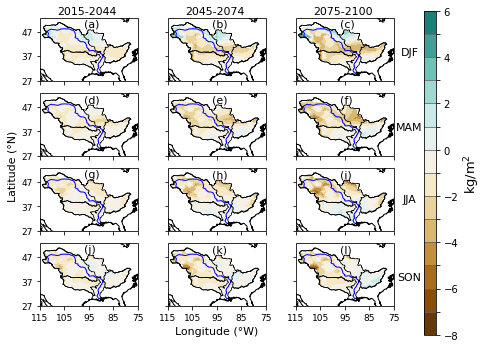

In [147]:

fraction_seasonMax = 1
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_sonTot_scenEraThree + 1)


fontSize = 9
textFontVal = 11
legendFontSize = 10
titleFontVal = 11

cbarTickFontSize = 10
cbarTextFontSize = 13

linewidth = 0.7
#++++++++++++++++++++

# Plot for August
#   https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=vmin_sonTot_scenEraThree, vmax=vmax_djfTot_scenEraThree+0, midpoint=0)
levels = np.linspace(vmin_sonTot_scenEraThree, vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax)) # to draw 11 levels
boundaries=np.linspace(vmin_sonTot_scenEraThree,vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax))

latTickLebelsStr = ['27', '37', '47', ]

lonTickLebelsStr = ['115', '105', '95', '85', '75',]


#fig = plt.figure(figsize=(26, 26), constrained_layout=True)
#fig = plt.figure(figsize=(12, 26), constrained_layout=True)
#fig = plt.figure(figsize=(12, 12), constrained_layout=True)
fig = plt.figure(figsize=(11, 5), constrained_layout=True)


#axs = [plt.subplot(1, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(3)]
#axs = [plt.subplot(2, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(6)]
axs = [plt.subplot(4, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(12)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_djfTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)
                              
plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
#plt.xlim([-125, -70])
#plt.ylim([27, 52])
ax1.set_xlim([-115, -75])
ax1.set_ylim([27, 52.5])

#ax1.set_yticks([27, 32, 37, 42, 47, 52]) 
ax1.set_yticks([27, 37, 47,]) 

#ax1.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax1.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax1.set_xticks([ -115, -105, -95, -85, -75,]) 

#latTickLebelsStr = ['27', '32', '37', '42', '47', '52' ]
latTickLebelsStr = ['27', '37', '47', ]

#lonTickLebelsStr = ['130', '125', '120', '115', '110', '105', '100', '95', '90', '85', '80', '75', '70',]
#lonTickLebelsStr = ['125', '120', '115', '110', '105', '100', '95', '90', '85', '80', '75', '70',]
#lonTickLebelsStr = [ '120', '110', '100', '90', '80', '70',]

ax1.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
#ax1.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax1.set_xticklabels('', fontSize = fontSize)

#ax1.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax1.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax1.set_title('(a)', fontsize = textFontVal)
#ax1.set_title('(a)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax1.set_title('(a)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#ax1.text(-105.0, 52.8, r'2015-2044', fontsize=titleFontVal)
ax1.text(-108.0, 54, r'2015-2044', fontsize=titleFontVal)

#plt.text(1.55, 1.1, 'August 2020', horizontalalignment='center', fontsize=16, transform=ax1.transAxes)
#plt.text(0.1, 0.1, '\u0394' + 'P for three thiry years under RCP3.70 (reference period: 1971-2000)',fontsize=18,fontweight='bold' )
#plt.text(0.35, 0.55, '\u0394' + 'P for three thiry years under RCP3.70 (reference period: 1971-2000)',fontsize=18,fontweight='bold' )

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_djfTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p2 = ax2.get_position().get_points().flatten()
#cbax2 = fig.add_axes([p2[0]+0.043, +0.04, (p2[2]-p5[0])*1.05, 0.025])
#cbax2 = fig.add_axes([p2[0]-0.165, +0.12, (p2[2]-p2[0])*3, 0.025])


#cbar2 =plt.colorbar(cp2, ax=ax2, cax=cbax2, shrink=.5, ticks=boundaries, orientation = 'horizontal') 
#cbar2.set_label("Change (%)", fontsize = 18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
ax2.set_xlim([-115, -75])
ax2.set_ylim([27, 52.5])
#ax2.set_yticks([27, 32, 37, 42, 47, 52]) 
ax2.set_yticks([27, 37, 47,]) 

ax2.set_yticklabels('', fontSize = fontSize)

#ax2.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax2.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax2.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax2.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax2.set_xticklabels('', fontSize = fontSize)

#ax2.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax2.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax2.set_title('(b) 2045-2074', fontsize = textFontVal)
#ax2.set_title('(b)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax2.set_title('(b)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#ax2.text(-105.0, 52.8, r'2045-2074', fontsize=titleFontVal)
ax2.text(-108.0, 54, r'2045-2074', fontsize=titleFontVal)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_djfTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
ax3.set_xlim([-115, -75])
ax3.set_ylim([27, 52.5])
#ax3.set_yticks([27, 32, 37, 42, 47, 52]) 
ax3.set_yticks([27, 37, 47,]) 

ax3.set_yticklabels('', fontSize = fontSize)

#ax3.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax3.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax3.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax3.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax3.set_xticklabels('', fontSize = fontSize)

#ax3.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax3.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax3.set_title('(c)', fontsize = textFontVal)
#ax3.set_title('(c)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax3.set_title('(c)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#ax3.text(-105.0, 52.8, r'2075-2100', fontsize=titleFontVal)
ax3.text(-108.0, 54, r'2075-2100', fontsize=titleFontVal)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,param_mamTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)
#plt.xlim([-125, -70])
#plt.ylim([27, 52])
ax4.set_xlim([-115, -75])
ax4.set_ylim([27, 52.5])

#ax4.set_yticks([27, 32, 37, 42, 47, 52]) 
ax4.set_yticks([27, 37, 47,]) 

#ax4.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax4.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax4.set_xticks([ -115, -105, -95, -85, -75,]) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
#ax4.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax4.set_xticklabels('', fontSize = fontSize)

#ax4.set_ylabel('Latitude (°N)', fontsize = textFontVal)
ax4.set_ylabel('Latitude (°N)', fontsize = textFontVal, y=-0.15)

#ax4.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax4.set_title('(d)', fontsize = textFontVal)
#ax4.set_title('(d)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax4.set_title('(d)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,param_mamTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p5 = ax5.get_position().get_points().flatten()
#cbax2 = fig.add_axes([p2[0]+0.043, +0.04, (p2[2]-p5[0])*1.05, 0.025])
#cbax5 = fig.add_axes([p5[0]-0.165, +0.04, (p5[2]-p5[0])*3, 0.025])

#cbar5 =plt.colorbar(cp5, ax=ax5, cax=cbax5, shrink=.5, ticks=boundaries, orientation = 'horizontal') 
#cbar5.set_label("Change (%)", fontsize = 18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
ax5.set_xlim([-115, -75])
ax5.set_ylim([27, 52.5])
#ax5.set_yticks([27, 32, 37, 42, 47, 52]) 
ax5.set_yticks([27, 37, 47,]) 

ax5.set_yticklabels('', fontSize = fontSize)

#ax5.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax5.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax5.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax5.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax5.set_xticklabels('', fontSize = fontSize)

#ax5.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax5.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax5.set_title('(e)', fontsize = textFontVal)
#ax5.set_title('(e)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax5.set_title('(e)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,param_mamTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
ax6.set_xlim([-115, -75])
ax6.set_ylim([27, 52.5])
#ax6.set_yticks([27, 32, 37, 42, 47, 52]) 
ax6.set_yticks([27, 37, 47,]) 

ax6.set_yticklabels('', fontSize = fontSize)

#ax6.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax6.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax6.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax6.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax6.set_xticklabels('', fontSize = fontSize)

#ax6.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax6.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax6.set_title('(f)', fontsize = textFontVal)
#ax6.set_title('(f)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax6.set_title('(f)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,param_jjaTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)
#plt.xlim([-125, -70])
#plt.ylim([27, 52])
ax7.set_xlim([-115, -75])
ax7.set_ylim([27, 52.5])

#ax7.set_yticks([27, 32, 37, 42, 47, 52]) 
ax7.set_yticks([27, 37, 47,]) 

#ax7.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax7.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax7.set_xticks([ -115, -105, -95, -85, -75,]) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
#ax7.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax7.set_xticklabels('', fontSize = fontSize)

#ax7.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax7.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax7.set_title('(g)', fontsize = textFontVal)
#ax7.set_title('(g)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax7.set_title('(g)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,param_jjaTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p8 = ax8.get_position().get_points().flatten()
#cbax8 = fig.add_axes([p2[0]+0.043, +0.04, (p2[2]-p5[0])*1.05, 0.025])
#cbax8 = fig.add_axes([p8[0]-0.165, +0.05, (p8[2]-p8[0])*3, 0.015])

#cbar8 =plt.colorbar(cp8, ax=ax8, cax=cbax8, shrink=.5, ticks=boundaries, orientation = 'horizontal') 
#cbar8.set_label("Change (%)", fontsize = 18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
ax8.set_xlim([-115, -75])
ax8.set_ylim([27, 52.5])
#ax8.set_yticks([27, 32, 37, 42, 47, 52]) 
ax8.set_yticks([27, 37, 47,]) 

ax8.set_yticklabels('', fontSize = fontSize)

#ax8.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,])
#ax8.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax8.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax8.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax8.set_xticklabels('', fontSize = fontSize)

#ax8.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax8.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax8.set_title('(h)', fontsize = textFontVal)
#ax8.set_title('(h)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax8.set_title('(h)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,param_jjaTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
ax9.set_xlim([-115, -75])
ax9.set_ylim([27, 52.5])
#ax9.set_yticks([27, 32, 37, 42, 47, 52]) 
ax9.set_yticks([27, 37, 47,]) 

ax9.set_yticklabels('', fontSize = fontSize)

#ax9.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax9.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax9.set_xticks([ -115, -105, -95, -85, -75,]) 

#ax9.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
ax9.set_xticklabels('', fontSize = fontSize)

#ax9.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax9.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax9.set_title('(i) 2075-2100', fontsize = textFontVal)
#ax9.set_title('(i)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax9.set_title('(i)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,param_sonTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)
#plt.xlim([-125, -70])
#plt.ylim([27, 52])
ax10.set_xlim([-115, -75])
ax10.set_ylim([27, 52.5])

#ax10.set_yticks([27, 32, 37, 42, 47, 52]) 
ax10.set_yticks([27, 37, 47,]) 

#ax7.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax10.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax10.set_xticks([ -115, -105, -95, -85, -75,]) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
ax10.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)


#ax10.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax10.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax10.set_title('(j)', fontsize = textFontVal)
#ax10.set_title('(j)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax10.set_title('(j)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,param_sonTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p11 = ax11.get_position().get_points().flatten()
#cbax8 = fig.add_axes([p2[0]+0.043, +0.04, (p2[2]-p5[0])*1.05, 0.025])
#cbax11 = fig.add_axes([p11[0]-0.295, +0.05, (p11[2]-p11[0])*4, 0.015])
#cbax11 = fig.add_axes([p11[0]-0.295, +0.05, (p11[2]-p11[0])*3.5, 0.015])
cbax11 = fig.add_axes([p11[0]+0.18, +0.02, (p11[2]-p11[0])*0.12, 0.9])


#cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'horizontal') 
cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'vertical') 

cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for label in cbar11.ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

#cbar11.set_label("kg/$\mathregular{m^{2}}$", fontsize = 18)
cbar11.set_label("kg/$\mathregular{m^{2}}$", fontsize = cbarTextFontSize)


plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
ax11.set_xlim([-115, -75])
ax11.set_ylim([27, 52.5])
#ax11.set_yticks([27, 32, 37, 42, 47, 52]) 
ax11.set_yticks([27, 37, 47,]) 

ax11.set_yticklabels('', fontSize = fontSize)

#ax8.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,])
#ax11.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax11.set_xticks([ -115, -105, -95, -85, -75,]) 

ax11.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
#ax11.set_ylabel('Latitude (°N)', fontsize = textFontVal)
ax11.set_xlabel('Longitude (°W)', fontsize = textFontVal)

#ax11.set_title('(k)', fontsize = textFontVal)
#ax11.set_title('(k)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax11.set_title('(k)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,param_sonTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
ax12.set_xlim([-115, -75])
#ax12.set_ylim([27, 52])
ax12.set_ylim([27, 52.5])

#ax12.set_yticks([27, 32, 37, 42, 47, 52]) 
ax12.set_yticks([27, 37, 47,]) 

ax12.set_yticklabels('', fontSize = fontSize)

#ax9.set_xticks([ -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70,]) 
#ax12.set_xticks([ -120, -110, -100, -90, -80,  -70,]) 
ax12.set_xticks([ -115, -105, -95, -85, -75,]) 

ax12.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)
#ax9.set_ylabel('Latitude (°N)', fontsize = textFontVal)
#ax12.set_xlabel('Longitude (°W)', fontsize = textFontVal)
#ax12.set_title('(l)', fontsize = textFontVal)
#ax12.set_title('(l)', x = 0.01, y=0.995, pad=-14, fontsize = textFontVal,loc='left')
ax12.set_title('(l)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#plt.text(-9.4, 690, 'DJF', fontsize=18)
#plt.text(-9.4, 500, 'MAM', fontsize=18)
#plt.text(-9.4, 310, 'JJA', fontsize=18)
#plt.text(-9.4, 120, 'SON', fontsize=18)

plt.text(-34, 4.10, 'DJF', fontsize=titleFontVal)
plt.text(-39, 0.85, 'MAM', fontsize=titleFontVal)
plt.text(-32, -2.25, 'JJA', fontsize=titleFontVal)
plt.text(-38, -5.65, 'SON', fontsize=titleFontVal)

#plt.text(0.35, 0.55, '\u0394' + 'P for three thiry years under RCP3.70 (reference period: 1971-2000)',fontsize=18,fontweight='bold' )
#fig.suptitle('this is the figure title')
#st = fig.suptitle("Seasonal " + '\u0394' + "P for three periods under RCP3.70 (reference period: 1971-2000)", fontsize = 20)
#st = fig.suptitle("Seasonal " + '\u0394' + "ET for three periods under RCP3.70", x=-110.0, y=55, fontsize = 20)
#st = fig.suptitle("Seasonal " + "change in soil moisture for three time periods", x=-110.0, y=62, fontsize = grandTitleFontVal)
#st.set_y(0.42)
#st.set_x(0.565)
#fig.subplots_adjust(top=2.25)
#plt.subplots_adjust(left = 0.125, right=1, bottom = 0.09, top = 0.4, wspace = 0.1, hspace = 0.1)

plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

#plt.margins(x=0)
#plt.axis('tight')
#ax.axis('tight')

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\soilMoist\seasonal\tcfSoilMoistSeasMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\soilMoist\seasonal\tcfSoilMoistSeasMap.png', dpi=600)  


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [148]:
STOP here ===================

SyntaxError: invalid syntax (<ipython-input-148-f3db6e1961f9>, line 1)